# Loan Defaulters Prediction



## Problem Statement:
   
   
   **An organization wants to predict who possible defaulters are for the consumer loans product.
   They have data about historic customer behavior based on what they have observed. 
   Hence when they acquire new customers they want to predict who is riskier and who is not.**

In [1]:
!pip install jovian scikit-learn --upgrade --quiet

You should consider upgrading via the 'c:\users\sony\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


##  Downloading and Exploring the  Data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')


In [3]:
train_df=pd.read_csv("Training Data.csv")
train_df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
test_df=pd.read_csv("Test Data.csv")
test_df

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [5]:
train_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


#### There is no null values in our dataset

In [7]:
train_df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
train_df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Data Visulization

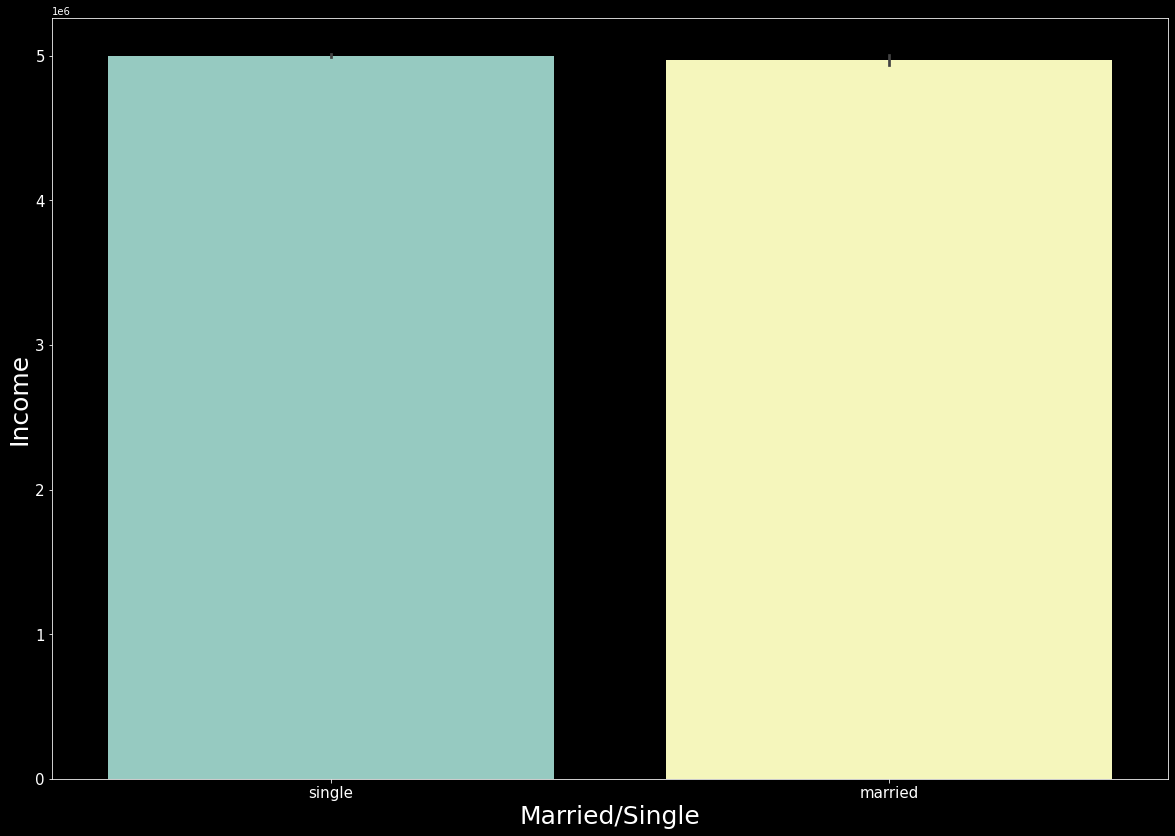

In [9]:
plt.figure(figsize=(20,14))
sns.barplot(data=train_df,x='Married/Single',y='Income');
plt.style.use('ggplot')
plt.xlabel('Married/Single',fontsize=25);
plt.ylabel('Income',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)

<Figure size 1440x864 with 0 Axes>

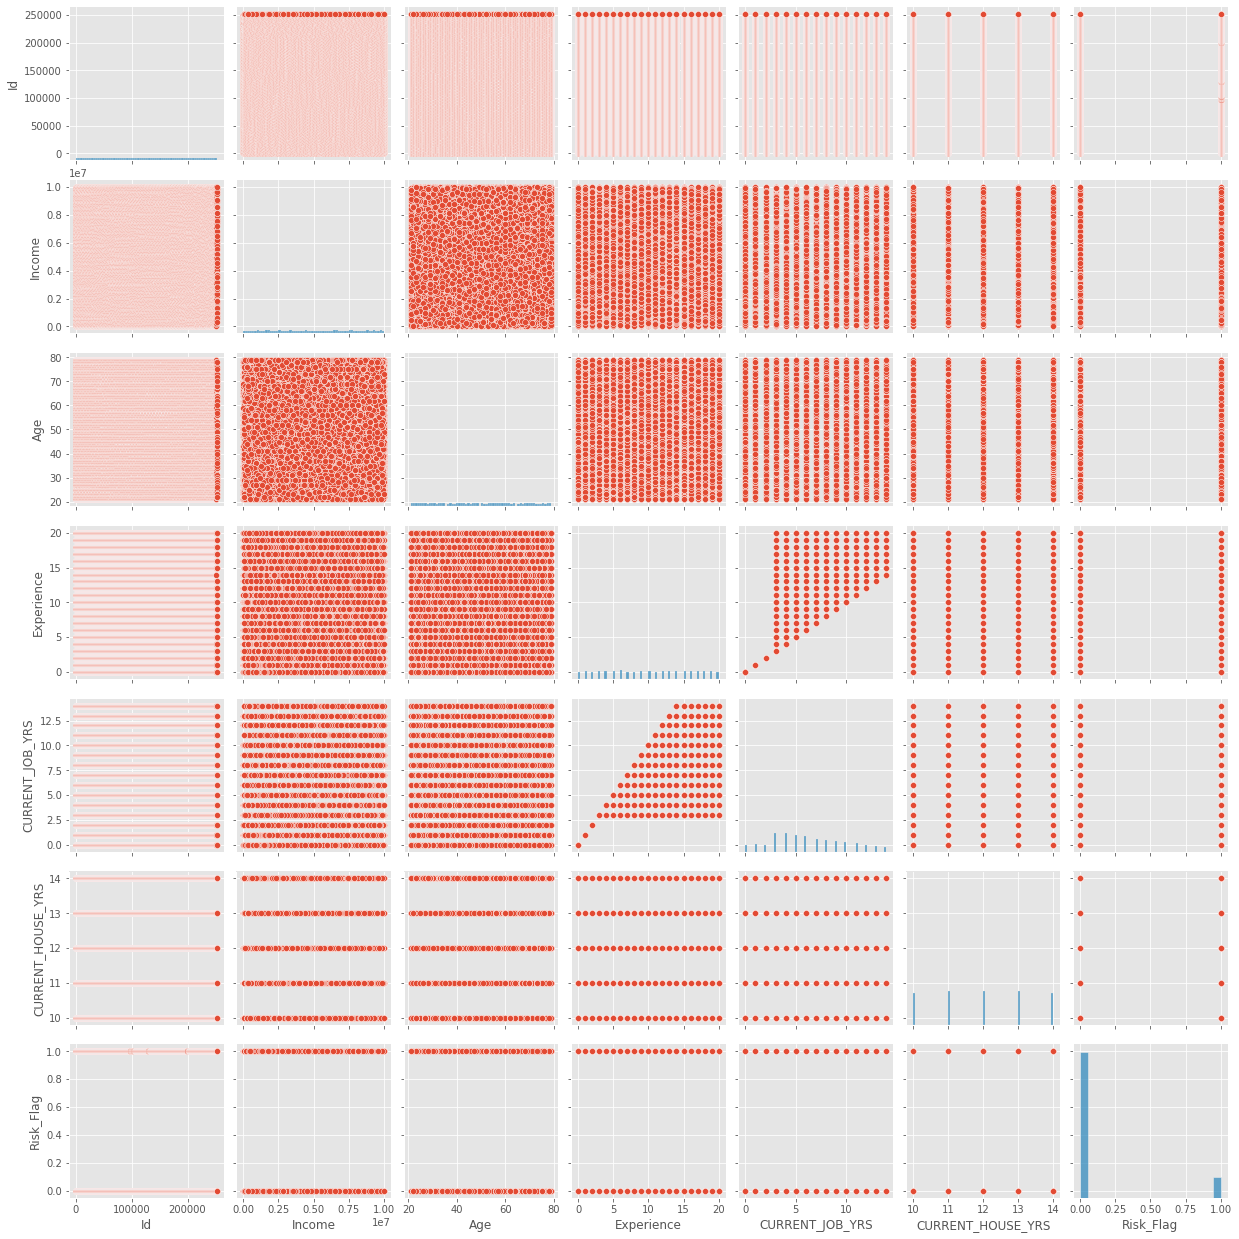

In [10]:
plt.figure(figsize=(20,12))
sns.pairplot(train_df);

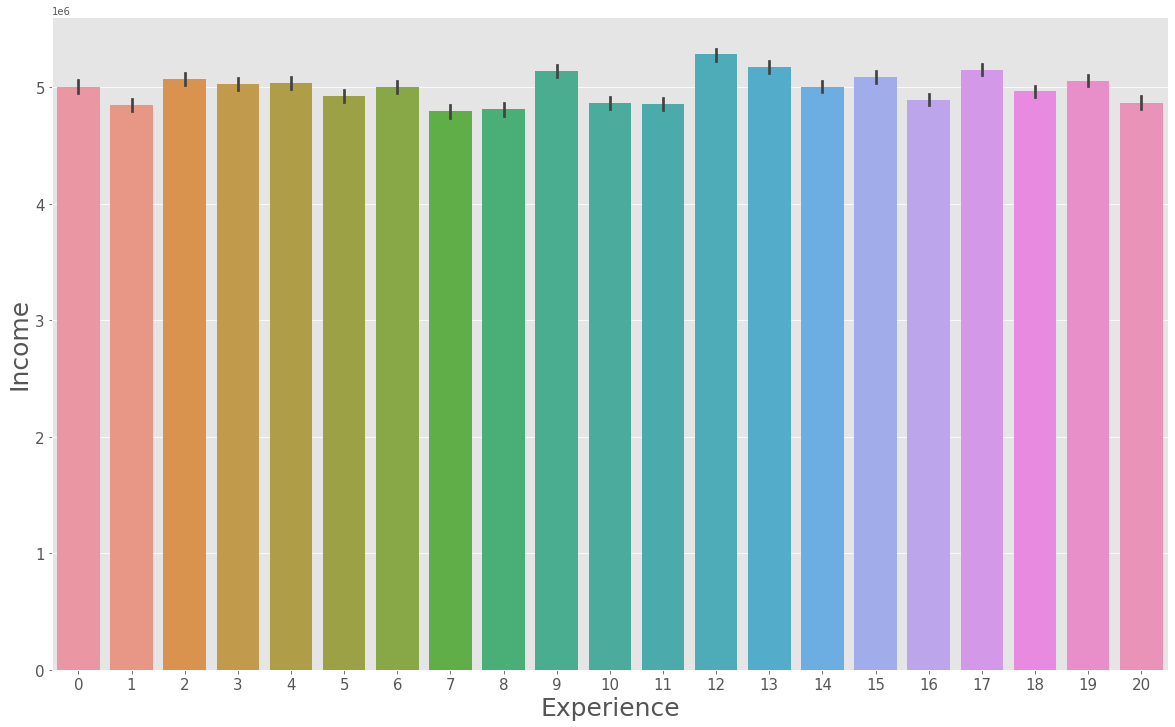

In [11]:
plt.figure(figsize=(20,12))
sns.barplot(data=train_df,x='Experience',y='Income')
plt.style.use('ggplot')
plt.xlabel('Experience',fontsize=25);
plt.ylabel('Income',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)

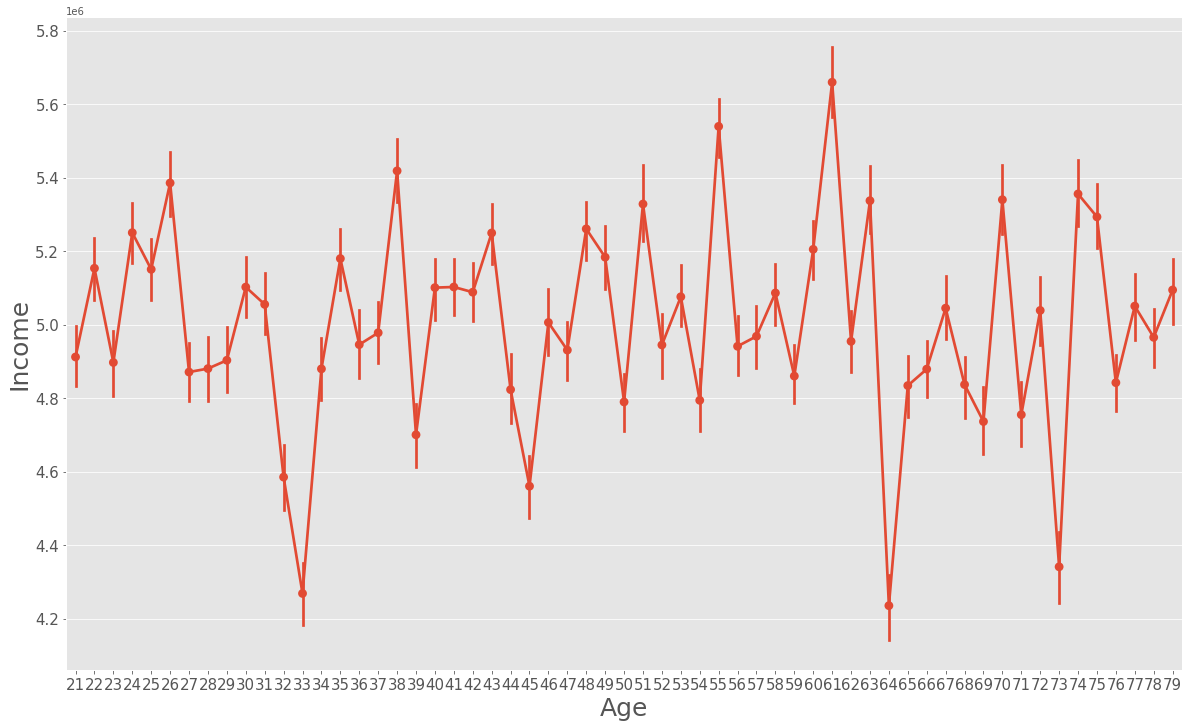

In [12]:
plt.figure(figsize=(20,12))
sns.pointplot(data=train_df,x='Age',y='Income');
plt.xlabel('Age',fontsize=25);
plt.ylabel('Income',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)


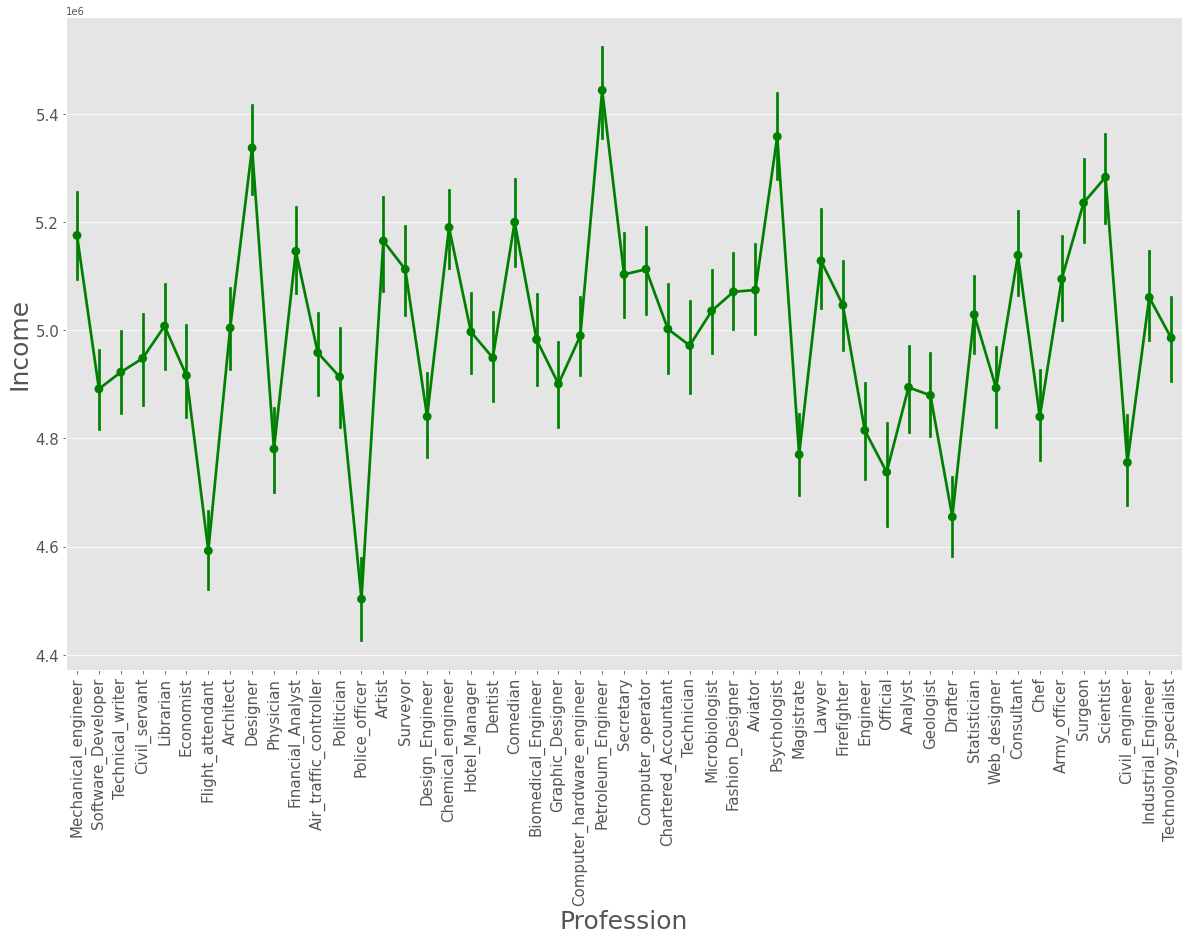

In [13]:
plt.figure(figsize=(20,12))
sns.pointplot(data=train_df,x='Profession',y='Income',color='green');
plt.tick_params(which='major',rotation=90,axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)
plt.xlabel('Profession',fontsize=25);
plt.ylabel('Income',fontsize=25);

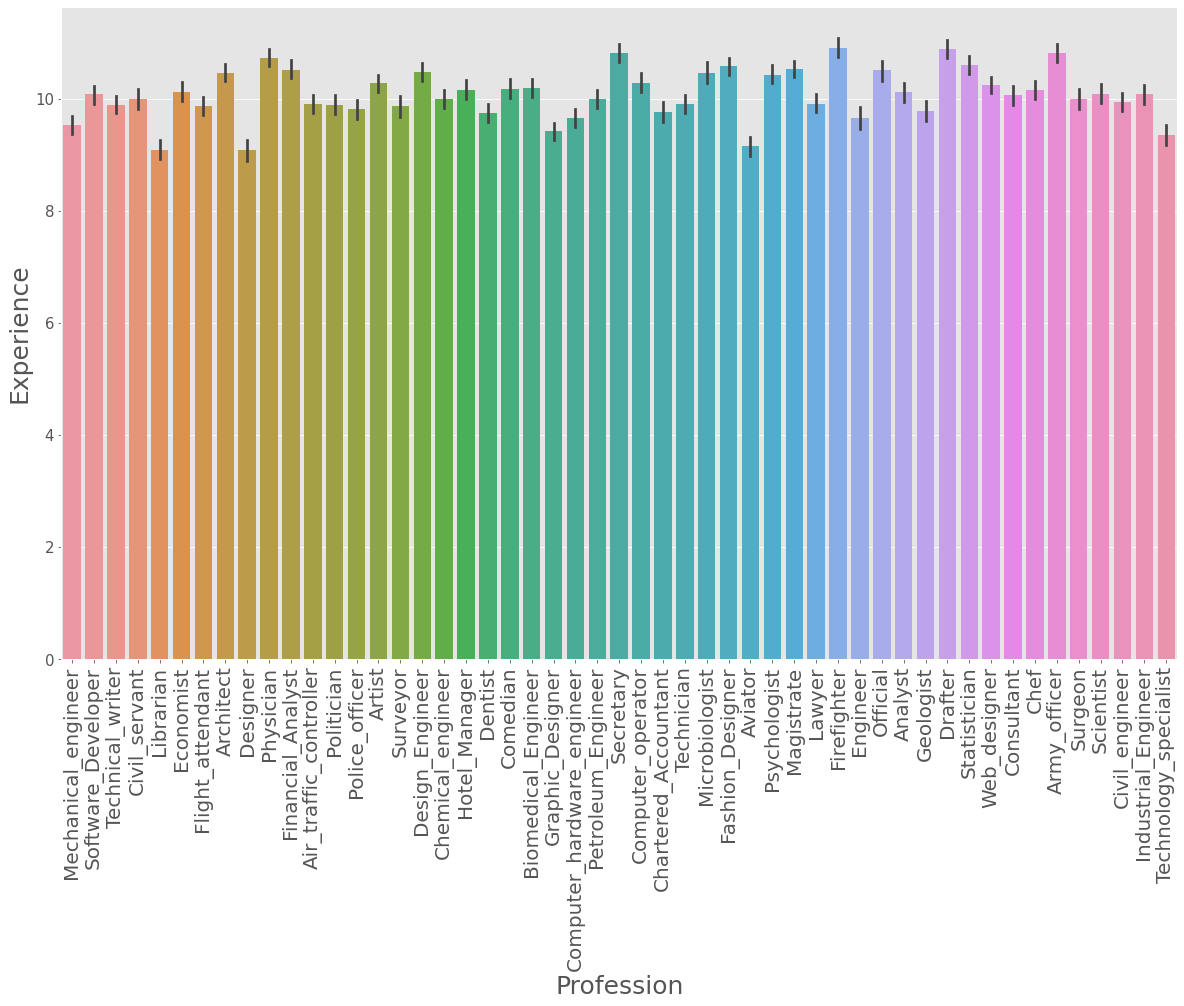

In [14]:
plt.figure(figsize=(20,12))
sns.barplot(data=train_df,x='Profession',y='Experience');
plt.tick_params(which='major',rotation=90,axis='x',labelsize=20)
plt.tick_params(which='major',axis='y',labelsize=15)
plt.xlabel('Profession',fontsize=25);
plt.ylabel('Experience',fontsize=25);

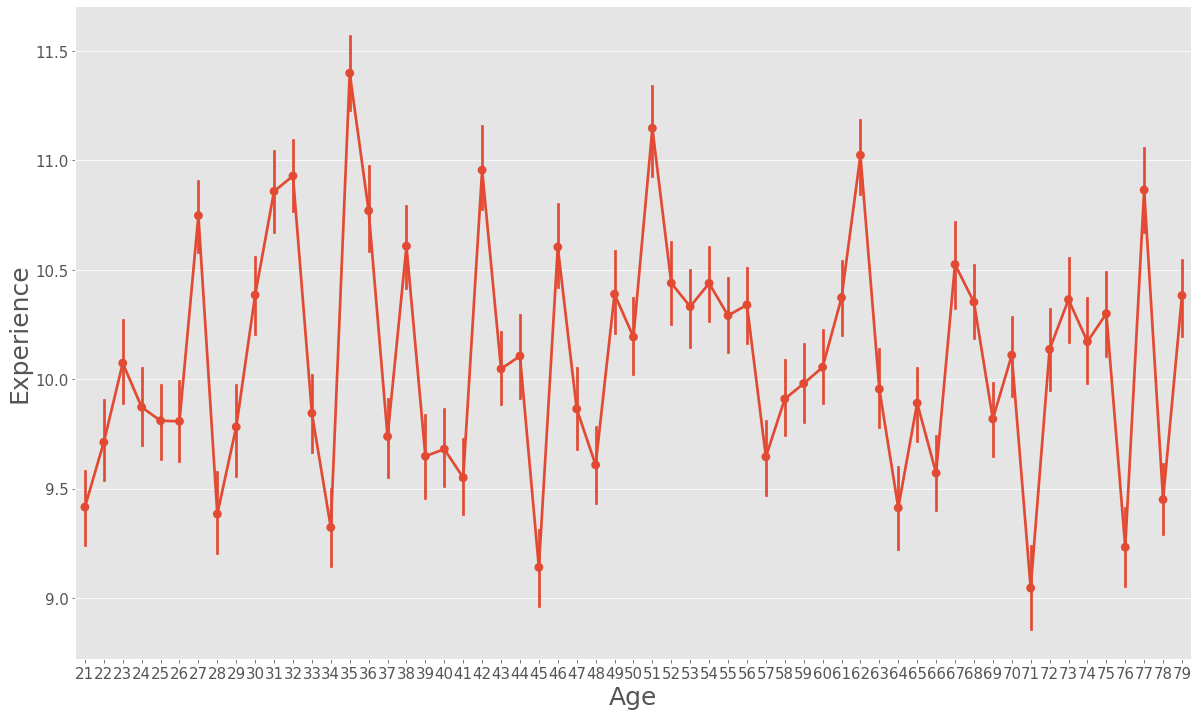

In [15]:
plt.figure(figsize=(20,12))
sns.pointplot(data=train_df,x='Age',y='Experience');
plt.xlabel('Age',fontsize=25);
plt.ylabel('Experience',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)


## Step 2: Preparing the Data for training

In [16]:
## input columns
input_cols=train_df.columns[1:-1]
list((input_cols))

['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

In [17]:
## target Columns
target_col="Risk_Flag"
print(target_col)

Risk_Flag


In [18]:
## Input df
input_df=train_df[input_cols].copy()
input_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10


In [19]:
## target df
target=train_df[target_col].copy()
target

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [20]:
train_df["CITY"].nunique()

317

In [21]:
train_df["Profession"].nunique()

51

In [22]:
train_df.STATE.nunique()

29

In [23]:
input_df=input_df.drop(columns=['CITY','STATE'],axis=1)
input_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13
1,7574516,40,10,single,rented,no,Software_Developer,9,13
2,3991815,66,4,married,rented,no,Technical_writer,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,2,12
4,5768871,47,11,single,rented,no,Civil_servant,3,14
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,6,11
251996,2843572,26,10,single,rented,no,Army_officer,6,11
251997,4522448,46,7,single,rented,no,Design_Engineer,7,12
251998,6507128,45,0,single,rented,no,Graphic_Designer,0,10


In [24]:
test_df=test_df.drop(columns=['ID'],axis=1)
test_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [25]:
target

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

## Identifying Numeric and Categorical Columns

In [26]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CURRENT_JOB_YRS    252000 non-null  int64 
 8   CURRENT_HOUSE_YRS  252000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.3+ MB


In [27]:
numeric_cols=input_df.select_dtypes(include=['int64']).columns.tolist()
numeric_cols

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [28]:
categorical_cols=input_df.select_dtypes('object').columns.tolist()
categorical_cols

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']

In [29]:
input_df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [30]:
input_df['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
input_df['Married/Single'].unique()

array(['single', 'married'], dtype=object)

## Scaling Numeric Columns

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
scaler.fit(input_df[numeric_cols])

MinMaxScaler()

In [35]:
input_df[numeric_cols]=scaler.transform(input_df[numeric_cols])

In [36]:
input_df[numeric_cols].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.452420,0.499448
std,0.288130,0.294204,0.300129,0.260504,0.349759
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,0.214286,0.250000
50%,0.499557,0.500000,0.500000,0.428571,0.500000
75%,0.747495,0.758621,0.750000,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Encode Categorical Columns

In [37]:
input_df[categorical_cols]

,Married/Single,House_Ownership,Car_Ownership,Profession
0,single,rented,no,Mechanical_engineer
1,single,rented,no,Software_Developer
2,married,rented,no,Technical_writer
3,single,rented,yes,Software_Developer
4,single,rented,no,Civil_servant
...,...,...,...,...
251995,single,rented,no,Surgeon
251996,single,rented,no,Army_officer
251997,single,rented,no,Design_Engineer
251998,single,rented,no,Graphic_Designer


In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')

In [40]:
encoder.fit(input_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [41]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

58

In [42]:
input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])

In [43]:
input_df[encoded_cols]

,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251996,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251997,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251998,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
input_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,0.129487,0.034483,0.15,single,rented,no,Mechanical_engineer,0.214286,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.757206,0.327586,0.50,single,rented,no,Software_Developer,0.642857,0.75,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.398564,0.775862,0.20,married,rented,no,Technical_writer,0.285714,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.625263,0.344828,0.10,single,rented,yes,Software_Developer,0.142857,0.50,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.576454,0.448276,0.55,single,rented,no,Civil_servant,0.214286,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,single,rented,no,Surgeon,0.428571,0.25,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251996,0.283620,0.086207,0.50,single,rented,no,Army_officer,0.428571,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251997,0.451682,0.431034,0.35,single,rented,no,Design_Engineer,0.500000,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251998,0.650356,0.413793,0.00,single,rented,no,Graphic_Designer,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
input_df.shape

(252000, 67)

## Spliting Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_inputs,val_inputs,train_target,val_target=train_test_split(input_df[numeric_cols+encoded_cols],
                                                                       target,
                                                                     test_size=0.25,
                                                                       random_state=20)

In [48]:
train_inputs.shape

(189000, 63)

In [49]:
val_inputs

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
26931,0.753518,0.413793,0.20,0.285714,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196408,0.427600,0.551724,0.05,0.071429,0.50,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112190,0.862989,0.137931,0.50,0.571429,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137320,0.366525,0.137931,0.90,0.214286,1.00,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75648,0.699956,0.603448,0.20,0.285714,0.50,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14552,0.298047,0.655172,0.30,0.428571,0.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
179131,0.937409,0.568966,0.05,0.071429,0.50,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111366,0.455294,0.344828,0.90,0.428571,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77436,0.348597,0.775862,0.35,0.500000,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
train_target.shape

(189000,)

In [51]:
val_target.shape

(63000,)

In [52]:
test_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## Training Logistic Regression model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression(solver='liblinear',random_state=25,max_iter=150)

In [55]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_target)

LogisticRegression(max_iter=150, random_state=25, solver='liblinear')

In [56]:
model.coef_.tolist()

[[-0.038575627582638085,
  -0.21174125511247605,
  -0.42516806625077713,
  0.09134241725399928,
  -0.008870747529378374,
  -0.5336457124354919,
  -0.3152963003994496,
  -0.3418989146694204,
  -0.4510693991171558,
  -0.05597369904848036,
  -0.34762014760231996,
  -0.5013218652331624,
  0.12654836897394708,
  -0.06965645351468508,
  0.11283786409497445,
  0.26684875896651633,
  -0.008057899616015387,
  0.062404934500821165,
  0.020508614302252943,
  0.26070965835318727,
  -0.05159903596978054,
  -0.11396798737966708,
  0.10825319606264673,
  -0.1071612469002134,
  -0.050866124074227005,
  0.020408597775936926,
  0.022344067021533152,
  -0.028500306233421462,
  -0.1369158473160016,
  -0.1955409489310493,
  -0.15522606354300084,
  -0.0662425224869696,
  -0.25952011830742605,
  -0.12567258956068816,
  -0.06121939524768773,
  -0.17921405495587023,
  0.08605542046535634,
  -0.05728585110353341,
  0.2149532646243468,
  -0.06823749729249996,
  0.10567294301615951,
  -0.2613730497161015,
  0.026

In [57]:
model.intercept_

array([-0.84894201])

## Making Prediction and Evaluating the model 


In [58]:
train_preds=model.predict(train_inputs[numeric_cols+encoded_cols])

In [59]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
pd.value_counts(train_preds)

0    189000
dtype: int64

In [61]:
train_target

247880    0
178765    0
90252     0
56089     0
251080    0
         ..
220060    0
23775     1
37135     0
92634     0
245091    0
Name: Risk_Flag, Length: 189000, dtype: int64

In [62]:
train_probs=model.predict_proba(input_df[numeric_cols+encoded_cols])
train_probs

array([[0.85670588, 0.14329412],
       [0.83359564, 0.16640436],
       [0.87649146, 0.12350854],
       ...,
       [0.87864255, 0.12135745],
       [0.85179818, 0.14820182],
       [0.89520058, 0.10479942]])

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(train_target,train_preds)

0.8768042328042328

In [65]:
val_preds=model.predict(val_inputs[numeric_cols+encoded_cols])

In [66]:
val_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
accuracy_score(val_target,val_preds)

0.8775873015873016

## Making Prediction On Test Data

In [68]:
def predict_input(single_input):
    input_df =test_df
    
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob


predict_input(test_df)

(0, 0.8704090047738353)

## Training Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model=DecisionTreeClassifier(random_state=25,max_depth=5)

In [71]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_target)

DecisionTreeClassifier(max_depth=5, random_state=25)

In [72]:
model.score(train_inputs[numeric_cols+encoded_cols],train_target)

0.8776031746031746

In [73]:
train_preds = model.predict(train_inputs[numeric_cols+encoded_cols])

In [74]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
pd.value_counts(train_preds)

0    188631
1       369
dtype: int64

In [76]:
accuracy_score(train_preds,train_target)

0.8776031746031746

In [77]:
model.score(val_inputs[numeric_cols+encoded_cols], val_target)

0.8780793650793651

In [78]:
from sklearn.tree import plot_tree, export_text

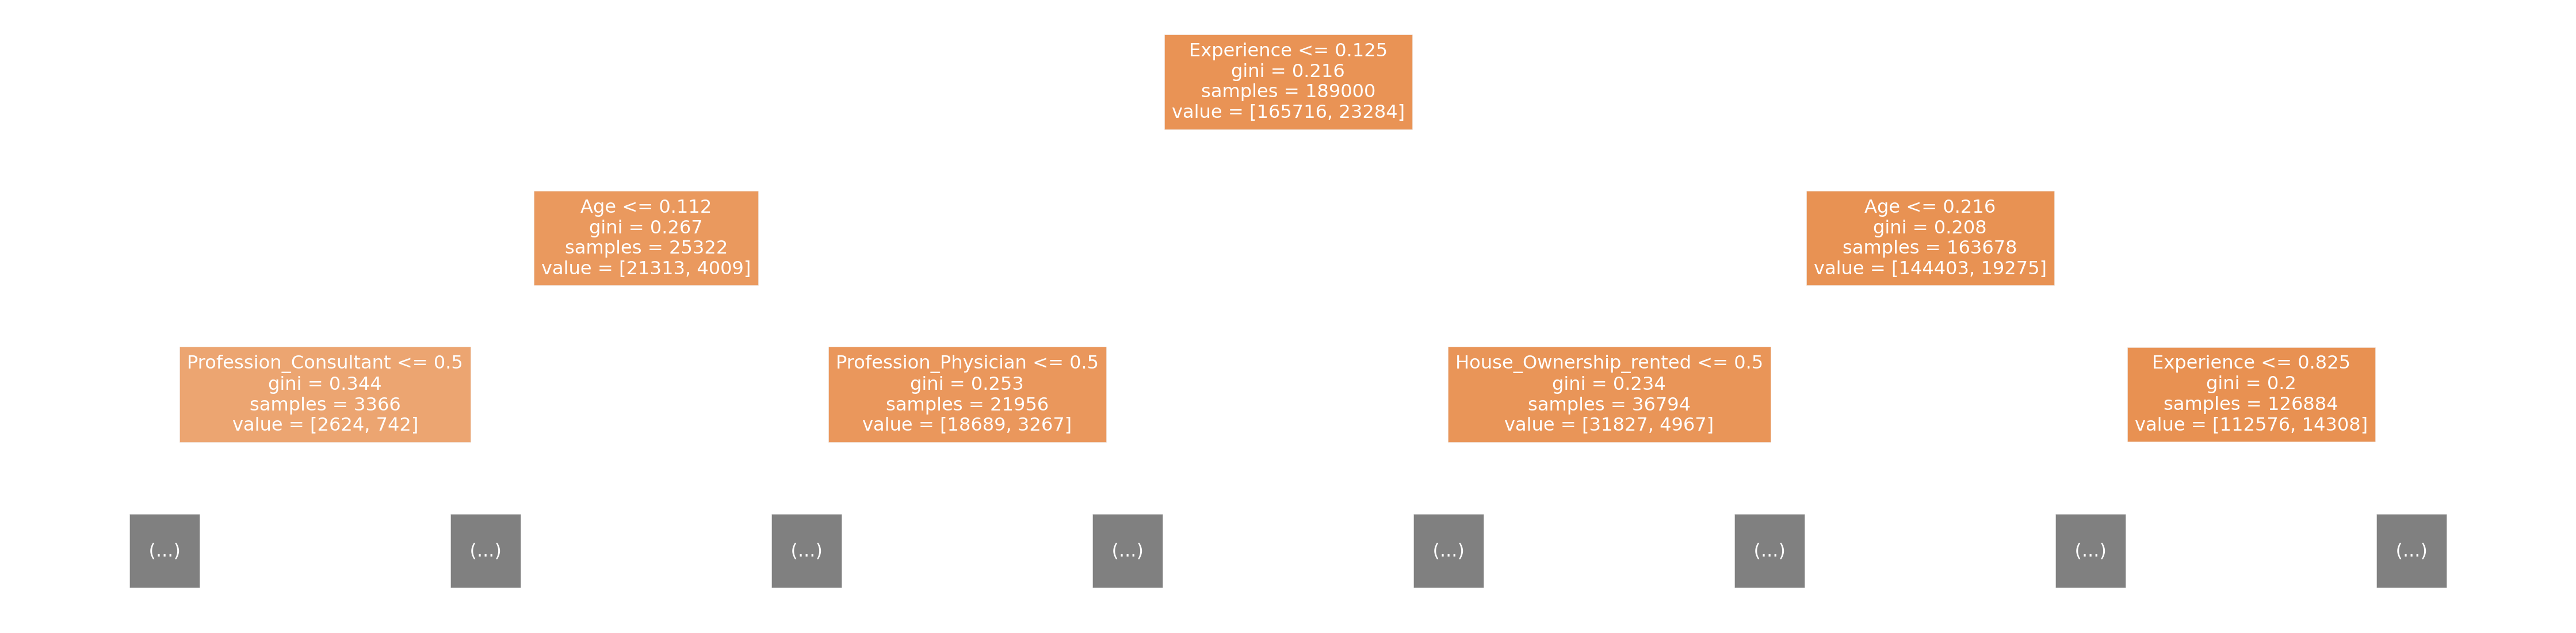

In [79]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs[numeric_cols+encoded_cols].columns, max_depth=2, filled=True);

In [80]:
tree_text = export_text(model, max_depth=10, feature_names=list(train_inputs[numeric_cols+encoded_cols].columns))
print(tree_text[:5000])

|--- Experience <= 0.13
|   |--- Age <= 0.11
|   |   |--- Profession_Consultant <= 0.50
|   |   |   |--- Profession_Police_officer <= 0.50
|   |   |   |   |--- Profession_Chartered_Accountant <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Profession_Chartered_Accountant >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Profession_Police_officer >  0.50
|   |   |   |   |--- CURRENT_HOUSE_YRS <= 0.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CURRENT_HOUSE_YRS >  0.62
|   |   |   |   |   |--- class: 0
|   |   |--- Profession_Consultant >  0.50
|   |   |   |--- Income <= 0.08
|   |   |   |   |--- Age <= 0.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  0.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- Income >  0.08
|   |   |   |   |--- Income <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  0.74
|   |   |   |   |   |--- class: 1
|   |--- Age >  0.11
|   |   |--- Profession_Physician <= 0.50
|   |   |   |-

In [81]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numeric_cols+encoded_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [82]:
importance_df.head(10)

,feature,importance
0,Income,0.217420
2,Experience,0.169954
28,Profession_Dentist,0.103732
1,Age,0.094408
50,Profession_Police_officer,0.068042
27,Profession_Consultant,0.067090
19,Profession_Chartered_Accountant,0.059671
4,CURRENT_HOUSE_YRS,0.046509
9,House_Ownership_rented,0.038082
11,Car_Ownership_yes,0.034966


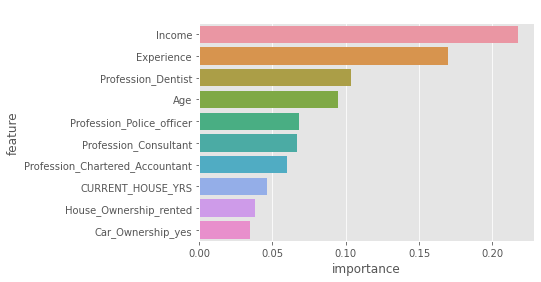

In [83]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [84]:
def predict_input(single_input):
    input_df =test_df
    
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob


predict_input(test_df)

(0, 0.8173076923076923)

## While Using Logistic Regression accuracy score on validation data is 0.8775 while using DecisionTreeClassifier it increase to 0.8780

In [85]:
import jovian

In [86]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/loan-prediction-based-on-customer-behavior" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/loan-prediction-based-on-customer-behavior
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
